## 4차 과제 - Hyperparameter Tuning을 해보자
- 주제: 하이퍼파라미터 튜닝 기법 학습
- 데이터: The History of Baseball(Pitching Data) https://www.kaggle.com/datasets/seanlahman/the-history-of-baseball?select=pitching.csv
- 사용 라이브러리: pandas, numpy, matplotlib, sklearn, imblearn, bayes_opt

### 1. EDA, 전처리

1.1 분석을 위해 사용될 라이브러리들을 import 하세요.

numpy, pandas, matplotlib, SMOTE, train_test_split, RandomForestClassifier, RandomizedSearchCV, GridSearchCV, BayesianOptimization, accuracy_score

In [1]:
!pip install bayesian-optimization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from bayes_opt import BayesianOptimization
from sklearn.metrics import accuracy_score

1.2 데이터를 불러오고 info()를 통해 데이터를 살펴보세요.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DAT/csv/pitching.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44139 entries, 0 to 44138
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   player_id  44139 non-null  object 
 1   year       44139 non-null  int64  
 2   stint      44139 non-null  int64  
 3   team_id    44139 non-null  object 
 4   league_id  44008 non-null  object 
 5   w          44139 non-null  int64  
 6   l          44139 non-null  int64  
 7   g          44139 non-null  int64  
 8   gs         44139 non-null  int64  
 9   cg         44139 non-null  int64  
 10  sho        44139 non-null  int64  
 11  sv         44139 non-null  int64  
 12  ipouts     44138 non-null  float64
 13  h          44139 non-null  int64  
 14  er         44139 non-null  int64  
 15  hr         44139 non-null  int64  
 16  bb         44139 non-null  int64  
 17  so         44139 non-null  int64  
 18  baopp      42614 non-null  float64
 19  era        44049 non-null  float64
 20  ibb   

1.3 null 값이 있는 컬럼은 모두 삭제하겠습니다(원래는 다른 처리를 해야 하지만 컬럼 수는 충분하니까..ㅎㅎ 야구 잘 몰라서 그런 거 아닙니다.).

In [4]:
# 결측치 있는 컬럼 삭제

df = df.dropna(axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44139 entries, 0 to 44138
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   player_id  44139 non-null  object
 1   year       44139 non-null  int64 
 2   stint      44139 non-null  int64 
 3   team_id    44139 non-null  object
 4   w          44139 non-null  int64 
 5   l          44139 non-null  int64 
 6   g          44139 non-null  int64 
 7   gs         44139 non-null  int64 
 8   cg         44139 non-null  int64 
 9   sho        44139 non-null  int64 
 10  sv         44139 non-null  int64 
 11  h          44139 non-null  int64 
 12  er         44139 non-null  int64 
 13  hr         44139 non-null  int64 
 14  bb         44139 non-null  int64 
 15  so         44139 non-null  int64 
 16  bk         44139 non-null  int64 
 17  r          44139 non-null  int64 
dtypes: int64(16), object(2)
memory usage: 6.1+ MB


In [ ]:
df.head()

,player_id,year,stint,team_id,w,l,g,gs,cg,sho,sv,h,er,hr,bb,so,bk,r
0,bechtge01,1871,1,PH1,1,2,3,3,2,0,0,43,23,0,11,1,0,42
1,brainas01,1871,1,WS3,12,15,30,30,30,0,0,361,132,4,37,13,0,292
2,fergubo01,1871,1,NY2,0,0,1,0,0,0,0,8,3,0,0,0,0,9
3,fishech01,1871,1,RC1,4,16,24,24,22,1,0,295,103,3,31,15,0,257
4,fleetfr01,1871,1,NY2,0,1,1,1,1,0,0,20,10,0,3,0,0,21


1.4 연도 별로 몇개의 데이터가 있는 지 확인 후 데이터가 얼마 없는 과거 데이터는 삭제하겠습니다. 이를 위해 연도 별 데이터 수를 계산하고 line plot으로 그리세요.

In [5]:
# 연도 별로 groupby 한 후에 각 연도 별로 몇 개의 데이터가 있는지 확인
df.groupby('year').count()

,player_id,stint,team_id,w,l,g,gs,cg,sho,sv,h,er,hr,bb,so,bk,r
year,,,,,,,,,,,,,,,,,
1871,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19
1872,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23
1873,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25
1874,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
1875,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,707,707,707,707,707,707,707,707,707,707,707,707,707,707,707,707,707
2012,722,722,722,722,722,722,722,722,722,722,722,722,722,722,722,722,722
2013,726,726,726,726,726,726,726,726,726,726,726,726,726,726,726,726,726


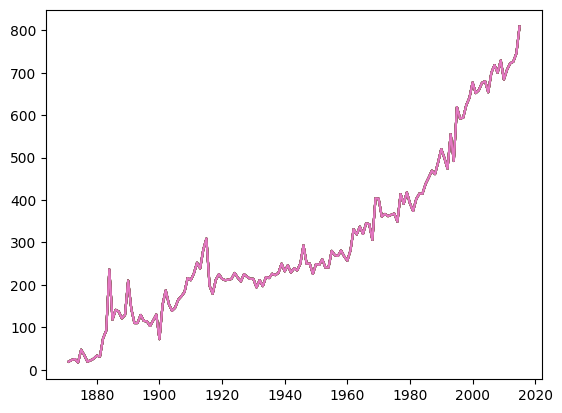

In [6]:
# x= year(연도), y= player 수(연도 별 선수 명수) -> line plot 그리기
plt.plot(df.groupby('year').count())

1.5 보다 최신 분석을 위해 1980년 이후의 데이터만 남기고 몇개의 데이터가 남았는지 확인하세요.

In [7]:
# 1980년 이전의 데이터는 전부 삭제한 후 총 몇 개의 행들이 남았는지 확인

df = df[df['year'] >= 1980]
df.info() # 삭제한 결과 21157개의 행만 남았다.

<class 'pandas.core.frame.DataFrame'>
Index: 21157 entries, 22982 to 44138
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   player_id  21157 non-null  object
 1   year       21157 non-null  int64 
 2   stint      21157 non-null  int64 
 3   team_id    21157 non-null  object
 4   w          21157 non-null  int64 
 5   l          21157 non-null  int64 
 6   g          21157 non-null  int64 
 7   gs         21157 non-null  int64 
 8   cg         21157 non-null  int64 
 9   sho        21157 non-null  int64 
 10  sv         21157 non-null  int64 
 11  h          21157 non-null  int64 
 12  er         21157 non-null  int64 
 13  hr         21157 non-null  int64 
 14  bb         21157 non-null  int64 
 15  so         21157 non-null  int64 
 16  bk         21157 non-null  int64 
 17  r          21157 non-null  int64 
dtypes: int64(16), object(2)
memory usage: 3.1+ MB


1.6 reset_index()를 통해 재배열하세요.

In [8]:
# rest_index()를 통해 재배열하기

df =df.reset_index()

In [9]:
df

,index,player_id,year,stint,team_id,w,l,g,gs,cg,sho,sv,h,er,hr,bb,so,bk,r
0,22982,aasedo01,1980,1,CAL,8,13,40,21,5,1,2,193,79,13,66,74,1,83
1,22983,abbotgl01,1980,1,SEA,12,12,31,31,7,2,0,228,98,27,49,78,1,110
2,22984,alexado01,1980,1,ATL,14,11,35,35,7,1,0,227,108,20,74,114,0,120
3,22985,allarbr01,1980,1,TEX,0,1,5,2,0,0,0,13,9,0,10,10,0,13
4,22986,allenne01,1980,1,NYN,7,10,59,0,0,0,22,87,40,7,40,79,1,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21152,44134,youngch03,2015,1,KCA,11,6,34,18,0,0,0,91,42,16,43,83,0,44
21153,44135,zieglbr01,2015,1,ARI,0,3,66,0,0,0,30,48,14,3,17,36,0,17
21154,44136,zimmejo02,2015,1,WAS,13,10,33,33,0,0,0,204,82,24,39,164,1,89
21155,44137,zitoba01,2015,1,OAK,0,0,3,2,0,0,0,12,8,4,6,2,0,8


reset_index() 메서드는 pandas DataFrame에서 인덱스를 재설정하는 데 사용된다.

1.7 투수의 승리 수를 예측해보겠습니다. w 컬럼의 value를 확인해보세요.

In [10]:
df['w'].value_counts()

w
0     5854
1     3197
2     2356
3     1744
4     1453
5     1114
6      878
7      730
9      560
8      557
10     450
11     434
12     384
13     317
14     287
15     242
16     193
17     125
18     102
19      61
20      53
21      32
22      17
24       8
23       7
25       1
27       1
Name: count, dtype: int64

1.8 0승 투수(출전하지 않은 경우도 존재)가 많으므로 승리 수가 0인 데이터는 삭제하겠습니다.

In [11]:
# df 중에서 w가 0인 행들을 전부 삭제

df = df[df['w'] != 0]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15303 entries, 0 to 21154
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      15303 non-null  int64 
 1   player_id  15303 non-null  object
 2   year       15303 non-null  int64 
 3   stint      15303 non-null  int64 
 4   team_id    15303 non-null  object
 5   w          15303 non-null  int64 
 6   l          15303 non-null  int64 
 7   g          15303 non-null  int64 
 8   gs         15303 non-null  int64 
 9   cg         15303 non-null  int64 
 10  sho        15303 non-null  int64 
 11  sv         15303 non-null  int64 
 12  h          15303 non-null  int64 
 13  er         15303 non-null  int64 
 14  hr         15303 non-null  int64 
 15  bb         15303 non-null  int64 
 16  so         15303 non-null  int64 
 17  bk         15303 non-null  int64 
 18  r          15303 non-null  int64 
dtypes: int64(17), object(2)
memory usage: 2.3+ MB


In [13]:
# 다시 reset_index()를 활용해 인덱스를 재설정해준다.
df = df.reset_index()

In [14]:
df

,level_0,index,player_id,year,stint,team_id,w,l,g,gs,cg,sho,sv,h,er,hr,bb,so,bk,r
0,0,22982,aasedo01,1980,1,CAL,8,13,40,21,5,1,2,193,79,13,66,74,1,83
1,1,22983,abbotgl01,1980,1,SEA,12,12,31,31,7,2,0,228,98,27,49,78,1,110
2,2,22984,alexado01,1980,1,ATL,14,11,35,35,7,1,0,227,108,20,74,114,0,120
3,4,22986,allenne01,1980,1,NYN,7,10,59,0,0,0,22,87,40,7,40,79,1,43
4,6,22988,andujjo01,1980,1,HOU,3,8,35,14,0,0,2,132,53,8,43,75,0,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15298,21147,44129,wrighmi01,2015,1,BAL,3,5,12,9,0,0,0,52,30,9,18,26,0,30
15299,21148,44130,wrighst01,2015,1,BOS,5,4,16,9,0,0,0,67,33,12,27,52,0,38
15300,21151,44133,yateski01,2015,1,TBA,1,0,20,0,0,0,0,23,18,10,7,21,0,18
15301,21152,44134,youngch03,2015,1,KCA,11,6,34,18,0,0,0,91,42,16,43,83,0,44


1.9 Regression이 아닌 Classification으로 분석해보겠습니다. 이를 위해 10을 기준으로 w를 10승 이상이면 1, 10승 미만이면 0인 Binary 형태로 변환하세요.

In [16]:
# 타겟 변수 만들기, w가 10 이상이면 1, 10 미만이면 0인 binary classification 변수 만든다.

df['target'] = np.where(df['w'] >= 10, 1, 0)

1.10 value_counts()를 통해 잘 나눠졌는지 확인해보세요.

In [17]:
df['target'].value_counts()

target
0    12589
1     2714
Name: count, dtype: int64

In [19]:
df

,level_0,index,player_id,year,stint,team_id,w,l,g,gs,...,sho,sv,h,er,hr,bb,so,bk,r,target
0,0,22982,aasedo01,1980,1,CAL,8,13,40,21,...,1,2,193,79,13,66,74,1,83,0
1,1,22983,abbotgl01,1980,1,SEA,12,12,31,31,...,2,0,228,98,27,49,78,1,110,1
2,2,22984,alexado01,1980,1,ATL,14,11,35,35,...,1,0,227,108,20,74,114,0,120,1
3,4,22986,allenne01,1980,1,NYN,7,10,59,0,...,0,22,87,40,7,40,79,1,43,0
4,6,22988,andujjo01,1980,1,HOU,3,8,35,14,...,0,2,132,53,8,43,75,0,59,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15298,21147,44129,wrighmi01,2015,1,BAL,3,5,12,9,...,0,0,52,30,9,18,26,0,30,0
15299,21148,44130,wrighst01,2015,1,BOS,5,4,16,9,...,0,0,67,33,12,27,52,0,38,0
15300,21151,44133,yateski01,2015,1,TBA,1,0,20,0,...,0,0,23,18,10,7,21,0,18,0
15301,21152,44134,youngch03,2015,1,KCA,11,6,34,18,...,0,0,91,42,16,43,83,0,44,1


1.11 종속 변수의 밸런스가 맞지 않는 것으로 확인됩니다. 이를 해결하기 위해 Under Sampling 혹은 Over Sampling 기법을 사용할 수 있는데 Under Sampling의 경우 데이터가 많지 않는 상황에서 사라지는 데이터가 과도하게 많으므로 Over Sampling 기법 중 SMOTE 기법을 사용해보겠습니다. 사용하기 전에 player_id, year, team_id 컬럼은 지우고 가겠습니다.

In [20]:
# player_id, year, team_id 컬럼을 지운다

df = df.drop(['player_id', 'year', 'team_id', 'index','level_0'], axis=1)

In [21]:
df['stint'].value_counts()

stint
1    14264
2     1014
3       23
4        2
Name: count, dtype: int64

In [22]:
df['target'].value_counts()

target
0    12589
1     2714
Name: count, dtype: int64

1.12 SMOTE 기법을 활용해 w의 balance를 맞추세요(sampling_strategy='auto', random_state = 123).

In [24]:
# SMOTE 기법을 활용해 w의 balance를 맞추자

smote = SMOTE(sampling_strategy='auto', random_state = 123)
X, y = smote.fit_resample(df.drop(columns=['target'],axis=1) , df['target'])

In [25]:
y.value_counts() # 클래스 불균형을 맞추었다.

target
0    12589
1    12589
Name: count, dtype: int64

1.13 balance가 잘 맞춰졌는지 확인하세요.

In [ ]:
y.value_counts() # 클래스 불균형을 맞추었다.

target
0    12589
1    12589
Name: count, dtype: int64

1.14 SMOTE의 동작 방식에 대해 작성하고 Over Sampling의 장/단점에 대해 작성하세요.

Over-Sampling은 말 그대로 데이터의 수를 Over하게 만드는 기법이다. 샘플링을 하는 목적은 다수 클래스와 소수 클래스의 비율을 맞춰주기 위함이다. 따라서 Over-Sampling은 소수 클래스의 수를 기존보다 Over하게 만들어서 다수 클래스의 수만큼 맞춰주는 것이다. 방법은 간단하다. 소수 클래스의 데이터를 다수 클래스의 데이터 수만큼 랜덤 복원 추출하는 것이다.

1.15 다른 Over Sampling 기법들엔 어떤 것들이 있는지 작성하세요(2개 이상).

SMOTE: 학습 데이터의 minority class의 정보를 활용해서 KNN기반으로 새로운 데이터 샘플을 생성하는 방법.

1. 임의로 minority class 샘플 하나를 선택한다.

2. minority class 중에서 해당 관측치와 유사도가 가장 큰 관측치 K 개를 선택한다.

3. 관측치들 간의 직선의 거리(difference)를 계산한다.

4. 랜덤하게 선택된 0~1 사이의 값을 곱한다

5. 이를 이용해서 직선 위에서 새로운 data point를 생성한다.

Border-line SMOTE:
 모든 minority data point가 아니라 Border-line 근처에 있는 관측치들에 대해서 집중적으로 오버샘플링을 실시하는 방법. border line 근처에 있을수록 상대적으로 분류하기가 힘들기 때문에 이러한 데이터 샘플을 추가로 생성하고 학습하여 모델의 성능을 향상시키는 방법.

### 2. 예측 및 분석

2.1 본격적으로 분석을 진행하겠습니다. 본 차시는 Hyperparameter Tuning에 대해 학습하는 것이 목적이므로 모델은 RandomForest Classifier 하나만 사용하도록 하겠습니다. 먼저 데이터를 train, validation, test 3개로 나누세요(trian-60%, val-20%, test-20%).

In [26]:
# train, test로 분리

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [28]:
# train 데이터를 다시 train, validation으로 분리

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=123)

In [29]:
# 각 train, validation, test 사이즈를 출력해준다.

print(X_train.shape, X_val.shape, X_test.shape)

(15106, 15) (5036, 15) (5036, 15)


In [ ]:
X_train.head()

,index,stint,w,l,g,gs,cg,sho,sv,h,er,hr,bb,so,bk,r
19524,39300,1,11,5,23,23,0,0,0,133,54,12,46,125,0,58
23515,34867,1,12,12,33,33,2,1,0,178,84,21,88,188,0,92
20087,24044,1,17,11,38,36,9,4,0,230,85,11,52,136,2,95
20797,41474,1,13,9,32,32,1,1,0,170,66,16,62,220,1,72
3355,27330,1,11,10,29,29,5,2,0,171,75,17,58,103,1,79


2.2 train test에 validation set을 추가하는 이유가 뭔지 작성하세요.

test data를 unseen data라고 가정하면 test data는 미래에 임의로 입력될 데이터라고 생각해야 하기 때문에 모델 검증 단계에선 사용하면 안 된다. 따라서 모델을 검증하기 위한 또다른 데이터셋이 필요한데 이 데이터셋을 validation set이라고 부른다.   

2.3 Randomized SearchCV로 최적의 파라미터 셋을 찾으세요(성능 지표는 accuracy score).

In [30]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

In [32]:
# randomized SearchCV를 활용해 최적의 파라미터 셋을 찾는다.
# 우선 random forest 모델 객체를 만들어 준다.

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, n_iter = 10, cv = 3, verbose=2, random_state=123, n_jobs = -1)

In [33]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200]},
                   random_state=123, verbose=2)

In [34]:
# 최적의 파라미터 셋 출력

rf_random.best_params_

{'n_estimators': 10,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_depth': 10,
 'criterion': 'gini',
 'bootstrap': False}

2.4 위에서 지정한 hyperparameter들이 각각 무엇을 의미하는지 작성하세요.

estimator: 모델 객체 지정

param_distribution: 하이퍼파라미터 목록을 dictionary 로 전달

n_iter: 파라미터 검색 횟수

cv: 교차 검증 시 fold 개수

verbose: 진행 상황 표시 유무

random_state: 호출할 때마다 동일한 학습/테스트용 데이터 세트를 생성하기 위해 주어지는 난수 값.

n_jobs: 사용할 CPU 코어 개수(-1: 모든 코어 사용)

2.5 Grid SearchCV로 최적의 파라미터 셋을 찾으세요.

In [35]:
param_grid2 = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

In [36]:
from sklearn.model_selection import GridSearchCV

rf2 = RandomForestClassifier()
rf_grid = GridSearchCV(estimator=rf2, param_grid=param_grid2, cv=3, verbose=2, n_jobs=-1)

In [37]:
rf_grid.fit(X_train,y_train)

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]},
             verbose=2)

In [38]:
# 최적의 파라미터 셋 출력

rf_grid.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

2.6 Randomized SearchCV와 Grid SearchCV의 차이와 장단점에 대해 설명하세요.

<figure>
    <img src="https://miro.medium.com/v2/resize:fit:781/1*8uSZqUSGa-UGF-0CDBd4Jw.png">
</figure>

RandomizedSearchCV: GridSearch에 비해 시간상 효율적이다. 데이터가 많고 파라미터 튜닝이 많이 필요할 떄 효과적이다.

GridSearchCV: 데이터가 많고, 튜닝해야 할 파라미터가 많은 경우 비효율적이다. 성능 개선을 위해 모든 파라미터 조합을 진행해야할 때 사용하는 것이 적절하다.


2.7 이번엔 Bayesian Optimization을 사용해 파라미터 튜닝을 진행해보겠습니다.

In [39]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

In [ ]:
# Bayesian Optimization을 사용해 파라미터 튜닝 진행

In [42]:
!pip install bayesian-optimization

In [40]:
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

In [41]:
# 파라미터 범위 설정
param_ranges = {
    'n_estimators': (10, 200),
    'max_depth': (3, 30),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 10),
    'max_features': (0.1, 1.0)
}

# 평가 함수 작성
def evaluate_rf(n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features):
    # Convert parameters to integer where applicable
    n_estimators = int(n_estimators)
    max_depth = int(max_depth)
    min_samples_split = int(min_samples_split)
    min_samples_leaf = int(min_samples_leaf)

    # Instantiate Random Forest classifier with given parameters
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators,
                                            max_depth=max_depth,
                                            min_samples_split=min_samples_split,
                                            min_samples_leaf=min_samples_leaf,
                                            max_features=max_features,
                                            random_state=123)

    # Perform cross-validation
    accuracies = cross_val_score(rf_classifier, X_train, y_train, scoring='accuracy', cv=5)

    # Return mean accuracy
    return np.mean(accuracies)

# 최적화 수행하기
rf_bo = BayesianOptimization(f=evaluate_rf, pbounds=param_ranges, random_state=42)
rf_bo.maximize(init_points=10, n_iter=10)

# 결과 출력
best_params = rf_bo.max['params']
best_score = rf_bo.max['target']

print("Best parameters:", best_params)
print("Best accuracy:", best_score)

|   iter    |  target   | max_depth | max_fe... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------
| 1         | 1.0       | 13.11     | 0.9556    | 7.588     | 12.78     | 39.64     |
| 2         | 1.0       | 7.212     | 0.1523    | 8.796     | 12.82     | 144.5     |
| 3         | 1.0       | 3.556     | 0.9729    | 8.492     | 5.822     | 44.55     |
| 4         | 1.0       | 7.952     | 0.3738    | 5.723     | 9.775     | 65.33     |
| 5         | 1.0       | 19.52     | 0.2255    | 3.629     | 8.595     | 96.65     |
| 6         | 1.0       | 24.2      | 0.2797    | 5.628     | 12.66     | 18.83     |
| 7         | 1.0       | 19.4      | 0.2535    | 1.585     | 19.08     | 193.5     |
| 8         | 1.0       | 24.83     | 0.3742    | 1.879     | 14.32     | 93.63     |
| 9         | 1.0       | 6.295     | 0.5457    | 1.309     | 18.37     | 59.17     |
| 10        | 1.0       | 20.89     | 0.3805    | 5.68

2.8 진행한 튜닝 과정에서 찾은 최적의 파라미터 셋으로 다시 학습을 진행한 후 최종 accuracy score을 출력하세요.

In [43]:
rf_best_param = RandomForestClassifier(n_estimators=39,
                                            max_depth=13,
                                            min_samples_split=12,
                                            min_samples_leaf=7,
                                            max_features=1,
                                            random_state=123)

In [44]:
# 훈련 및 accuracy score 출력
rf_best_param.fit(X_train,y_train)
rf_best_param.score(X_test,y_test)

0.9908657664813344

### 3. 자유분석

최적의 파라미터 셋을 찾고 성능을 높여보세요.

In [47]:
# EDA 진행

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# feature importance 출력
feature_importance = rf.feature_importances_
feature_importance_df = pd.DataFrame({'feature': X_train.columns, 'importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)
print(feature_importance_df)

   feature  importance
1        w    0.431762
8        h    0.143971
4       gs    0.126863
12      so    0.092526
14       r    0.066721
2        l    0.031524
10      hr    0.025317
11      bb    0.023980
9       er    0.023286
3        g    0.014130
5       cg    0.012630
6      sho    0.004694
7       sv    0.001577
13      bk    0.000929
0    stint    0.000090


In [48]:
# 피처 중요도가 낮은 stint, bk, sv, sho는 제거해준다.

X_train = X_train.drop(['stint', 'bk', 'sv', 'sho'], axis=1)
X_test = X_test.drop(['stint', 'bk', 'sv', 'sho'], axis=1)

In [49]:
# 다시 모델  학습 및 하이퍼 파라미터 튜닝

param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

rf_ = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf_, param_distributions = param_grid, n_iter = 10, cv = 5, verbose=2, random_state=123, n_jobs = -1)

In [50]:
rf_random.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


NameError: name 're_random' is not defined

In [52]:
rf_random.best_params_

{'n_estimators': 10,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_depth': 10,
 'criterion': 'gini',
 'bootstrap': False}

In [53]:
rf_best_param = RandomForestClassifier(n_estimators=10,
                                            max_depth=10,
                                            min_samples_split=10,
                                            min_samples_leaf=1,
                                            max_features=1,
                                            random_state=123)

In [54]:
# 훈련 및 accuracy score 출력
rf_best_param.fit(X_train,y_train)
rf_best_param.score(X_test,y_test)

0.9986100079428117